In [1]:
import simpy
import matplotlib.pyplot as plt

# Constantes
NUM_NODOS = 5
RANGO_PH = (0, 14)
PRECISION_PH = 0.1
RANGO_TURBIDEZ = (0, 100)
RANGO_TEMPERATURA = (-45, 125)
PRECISION_TEMPERATURA = 0.3
RANGO_HUMEDAD = (0, 100)
PRECISION_HUMEDAD = 3

# Función para crear un sensor
def sensor(env, nodo, tipo, rango, precision):
    while True:
        # Generar un valor de medición
        medicion = round(random.uniform(*rango), precision)
        # Enviar la medición al nodo
        nodo.medicion[tipo] = medicion
        # Esperar 15 minutos
        yield env.timeout(15)

# Función para crear un nodo
def nodo(env, ubicacion):
    # Crear los sensores
    sensores = {
        "pH": sensor(env, nodo, "pH", RANGO_PH, PRECISION_PH),
        "turbidez": sensor(env, nodo, "turbidez", RANGO_TURBIDEZ, None),
        "temperatura": sensor(env, nodo, "temperatura", RANGO_TEMPERATURA, PRECISION_TEMPERATURA),
        "humedad": sensor(env, nodo, "humedad", RANGO_HUMEDAD, PRECISION_HUMEDAD),
    }
    # Inicializar las mediciones
    for tipo in sensores:
        sensores[tipo].medicion = 0
    # Bucle de simulación
    while True:
        # Graficar las mediciones
        for tipo in sensores:
            plt.plot(env.now, sensores[tipo].medicion)
        plt.show()
        yield env.timeout(1)

# Crear la simulación
env = simpy.Environment()
# Crear los nodos
nodos = [nodo(env, (0, 0)), nodo(env, (1, 0)), nodo(env, (2, 0)), nodo(env, (3, 0)), nodo(env, (4, 0))]
# Iniciar la simulación
env.run()


In [113]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Definimos la clase Nodo
class Nodo:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.sensores = []

    def agregar_sensor(self, sensor):
        self.sensores.append(sensor)

# Definimos la clase Sensor
class Sensor:
    def __init__(self, tipo, rango, precision):
        self.tipo = tipo
        self.rango = rango
        self.precision = precision

    def medir(self):
        # Generamos un valor aleatorio dentro del rango del sensor
        valor = random.uniform(self.rango[0], self.rango[1])

        # Aplicamos un margen de error
        valor = valor + random.uniform(-self.precision, self.precision)

        return valor

# Definimos la función para generar los nodos
def generar_nodos(cantidad):
    nodos = []

    # Generamos una lista de coordenadas aleatorias
    coordenadas = np.random.rand(cantidad, 2)

    # Creamos los nodos
    for i in range(cantidad):
        nodos.append(Nodo(coordenadas[i][0], coordenadas[i][1]))

    return nodos

# Definimos la función para generar los sensores
def generar_sensores(nodos):
    sensores = []

    # Generamos un sensor de pH para cada nodo
    for nodo in nodos:
        sensores.append(Sensor("pH", (0, 14), 0.1))

    # Generamos un sensor de turbidez para cada nodo
    for nodo in nodos:
        sensores.append(Sensor("turbidez", (0, 255), 1))

    # Generamos un sensor de temperatura para cada nodo
    for nodo in nodos:
        sensores.append(Sensor("temperatura", (-45, 125), 0.3))

    # Generamos un sensor de humedad para cada nodo
    for nodo in nodos:
        sensores.append(Sensor("humedad", (0, 100), 3))

    return sensores

# Definimos la función para simular los datos de los sensores
def simular_datos(sensores):
    datos = []

    # Simulamos los datos de los sensores durante un día
    for t in range(24 * 4):
        # Generamos los datos de cada sensor
        for sensor in sensores:
            datos.append((t, sensor.medir()))

    return datos

# Definimos la función para graficar los datos
def graficar_datos(datos):
    # Creamos las figuras para los gráficos
    fig_pH, ax_pH = plt.subplots()
    fig_turbidez, ax_turbidez = plt.subplots()
    fig_temperatura, ax_temperatura = plt.subplots()
    fig_humedad, ax_humedad = plt.subplots()

    # Graficamos los datos de pH
    ax_pH.plot([d[0] for d in datos], [d[1] for d in datos if d[0] == 0], label="pH")
    ax_pH.set_title("pH")
    ax_pH.legend()

    # Graficamos los datos de turbidez
    ax_turbidez.plot([d[0] for d in datos], [d[1] for d in datos if d[0] == 1], label="Turbidez")
    ax_turbidez.set_title("Turbidez")
    ax_turbidez.legend()

    # Graficamos los datos de temperatura
    ax_temperatura.plot([d[0] for d in datos], [d[1] for d in datos if d[0] == 2], label="Temperatura")
    ax_temperatura.set_title("Temperatura")
    ax_temperatura.legend()

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def generate_random_graph(width, height, num_nodes):
  """
  Genera un gráfico de nodos aleatorios dentro de un área delimitada.

  Args:
    width: Ancho del área delimitada.
    height: Alto del área delimitada.
    num_nodes: Número de nodos a generar.

  Returns:
    Un gráfico de nodos aleatorios.
  """

  # Generar coordenadas aleatorias para los nodos.
  x_coordinates = np.random.uniform(0, width, size=num_nodes)
  y_coordinates = np.random.uniform(0, height, size=num_nodes)

  # Crear un gráfico de nodos.
  graph = nx.Graph()
  for i in range(num_nodes):
    graph.add_node(i, pos=(x_coordinates[i], y_coordinates[i]))

  # Graficar el gráfico.
  plt.figure(figsize=(width, height))
  nx.draw(graph, with_labels=True)
  plt.show()

  return graph


if __name__ == "__main__":
  # Generar un gráfico de 100 nodos dentro de un área de 100x80.
  graph = generate_random_graph(100, 80, 100)


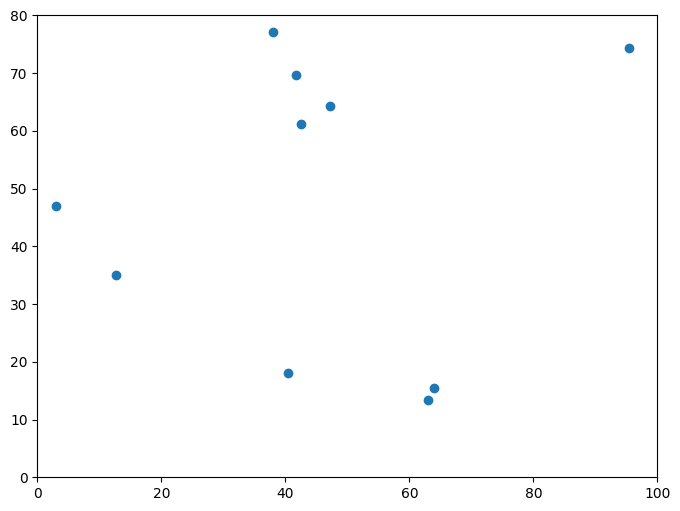

In [17]:
import matplotlib.pyplot as plt
import random

def generar_nodos(num_nodos, ancho, alto):
    nodos = []

    for _ in range(num_nodos):
        x = random.uniform(0, ancho)
        y = random.uniform(0, alto)
        nodos.append((x, y))

    return nodos

def graficar_nodos(nodos, ancho, alto):
    plt.figure(figsize=(8, 6))
    plt.scatter([nodo[0] for nodo in nodos], [nodo[1] for nodo in nodos])
    plt.xlim(0, ancho)
    plt.ylim(0, alto)
    plt.show()

# Ejemplo de uso
num_nodos = 10
ancho = 100
alto = 80

nodos = generar_nodos(num_nodos, ancho, alto)
graficar_nodos(nodos, ancho, alto)

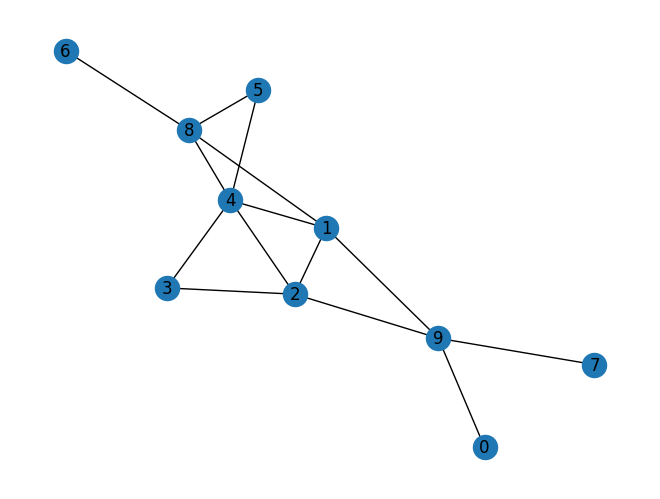

In [112]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos al grafo
num_nodes = 10
for i in range(num_nodes):
    G.add_node(i)

# Generar una cantidad aleatoria de enlaces
num_edges = 20
for _ in range(num_edges):
    u = random.randint(0, num_nodes - 1)
    v = random.randint(0, num_nodes - 1)
    if u != v and not G.has_edge(u, v):
        G.add_edge(u, v)

# Graficar el grafo
nx.draw(G, with_labels=True)
plt.show()

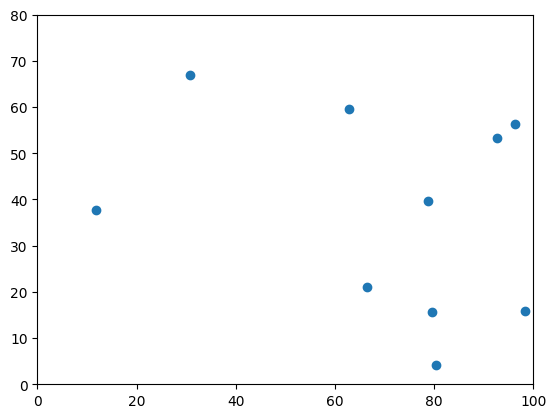

[(62.93210533243146, 59.65264314471567), (96.37864928379703, 56.4083399627378), (11.782705255558579, 37.81647432597281), (98.28813709872581, 15.754249180516107), (66.49480153925047, 21.076954920576902), (79.50210868621748, 15.575459882327092), (92.63770830426294, 53.383904835875526), (80.28203080923865, 4.117840464450611), (30.849439495626495, 66.92927283386679), (78.68038866870347, 39.737886359240676)]


In [27]:
import numpy as np
import matplotlib.pyplot as plt

def generar_grafico_nodos_aleatorios(n, ancho, alto):
  """
  Genera un gráfico de nodos aleatorios distribuidos uniformemente dentro de un área delimitada.

  Args:
    n: Número de nodos.
    ancho: Ancho del área delimitada.
    alto: Alto del área delimitada.

  Returns:
    Una lista de nodos, cada uno con sus coordenadas (x, y).
  """

  # Generar coordenadas aleatorias para los nodos
  x = np.random.uniform(0, ancho, n)
  y = np.random.uniform(0, alto, n)

  # Crear un gráfico de los nodos
  fig, ax = plt.subplots()
  ax.scatter(x, y)
  ax.set_xlim(0, ancho)
  ax.set_ylim(0, alto)
  plt.show()

  return list(zip(x, y))


if __name__ == "__main__":
  n = 10
  ancho = 100
  alto = 80

  nodos = generar_grafico_nodos_aleatorios(n, ancho, alto)

  print(nodos)


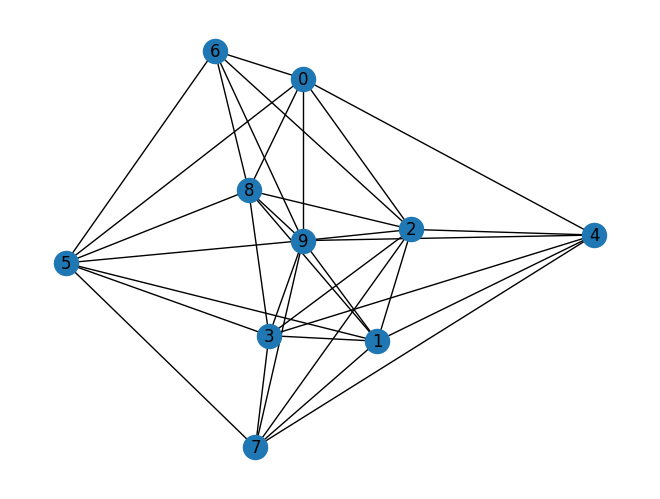

In [52]:
import networkx as nx
import matplotlib.pyplot as plt

def generar_grafo_aleatorio(ancho, alto, n_nodos):
  """
  Genera un grafo aleatorio con n_nodos nodos ubicados de forma uniforme dentro de un área de ancho ancho y alto alto.

  Args:
    ancho: Ancho del área delimitada.
    alto: Alto del área delimitada.
    n_nodos: Número de nodos del grafo.

  Returns:
    Un grafo de NetworkX con los nodos ubicados de forma uniforme.
  """

  # Generamos los nodos de forma aleatoria
  nodos = []
  for i in range(n_nodos):
    nodo = (random.randint(0, ancho), random.randint(0, alto))
    nodos.append(nodo)

  # Creamos el grafo
  G = nx.Graph()
  for i in range(n_nodos):
    for j in range(i + 1, n_nodos):
      if abs(nodos[i][0] - nodos[j][0]) <= ancho / 2 and abs(nodos[i][1] - nodos[j][1]) <= alto / 2:
        G.add_edge(i, j)

  # Graficamos el grafo
  plt.figure()
  nx.draw(G, pos=nodos, with_labels=True)
  plt.show()

  return G


if __name__ == "__main__":
  # Generamos un grafo con 100 nodos dentro de un área de 100 metros por 80 metros
  G = generar_grafo_aleatorio(100, 80, 10)


In [109]:
import matplotlib.pyplot as plt
import networkx as nx
import random

def generar_grafo(num_nodos):
    # Generar un grafo vacío
    G = nx.Graph()

    # Definir el rango de los nodos en cada eje
    rango_x = 100 / (num_nodos / 10)
    rango_y = 80 / (num_nodos / 10)

    # Generar nodos y agregarlos al grafo
    for i in range(num_nodos):
        nodo = (random.randint(0, rango_x), random.randint(0, rango_y))
        G.add_node(nodo)

    # Conectar nodos adyacentes en el grafo
    for nodo in G.nodes:
        vecinos = [(x, y) for (x, y) in G.nodes if abs(x - nodo[0]) < rango_x / 2 and abs(y - nodo[1]) < rango_y / 2]
        for vecino in vecinos:
            if vecino != nodo:
                G.add_edge(nodo, vecino)

    return G

def graficar_grafo(G):
    # Generar posiciones para los nodos en el plano
    pos = {nodo: (nodo[0], 80 - nodo[1]) for nodo in G.nodes}

    # Crear una instancia de plt.figure y configurarla para visualizar el grafo
    plt.figure(figsize=(10, 10))
    nx.draw(G, pos, with_labels=True, node_size=500, font_size=10)
    plt.xlabel('Metros')
    plt.ylabel('Metros')
    plt.title('Gráfico de Nodos Aleatorios')
    plt.axis('equal')

    plt.show()

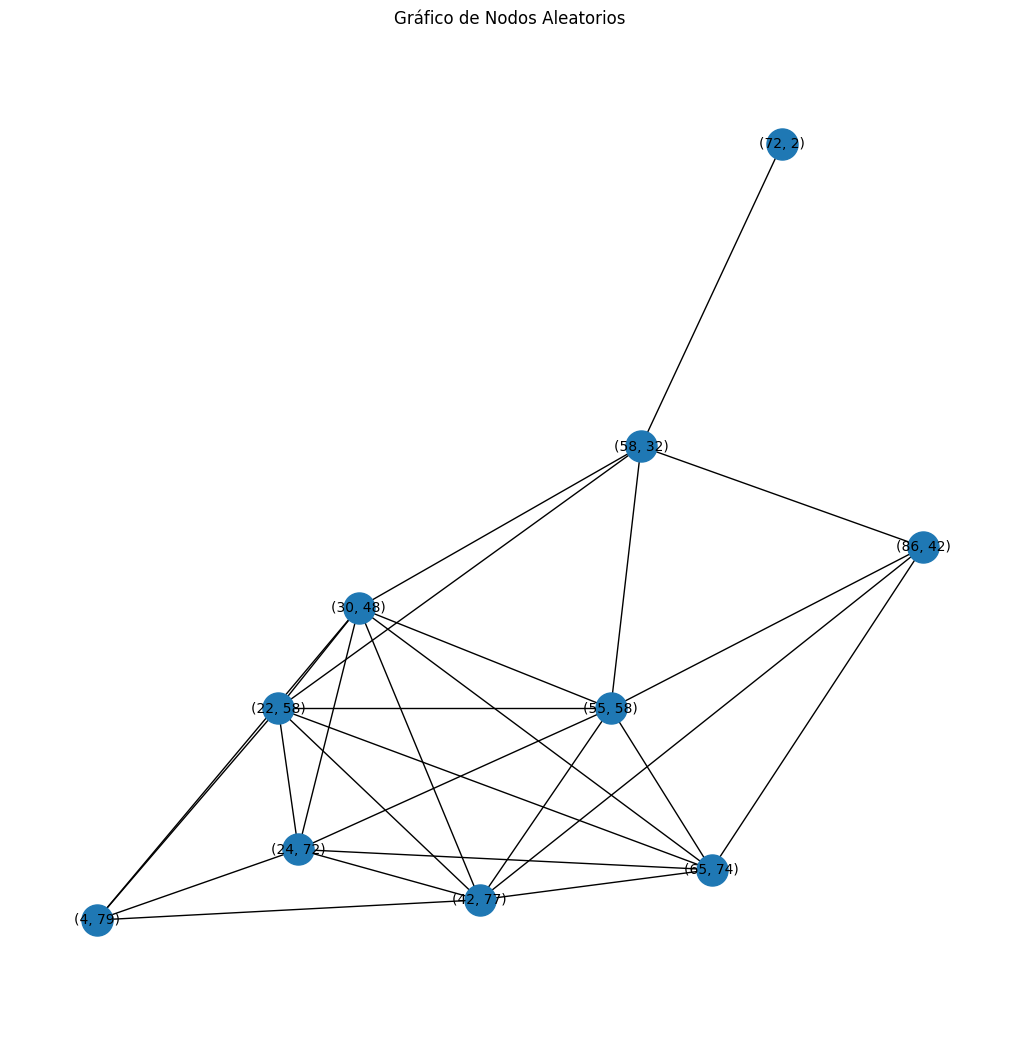

In [110]:
graficar_grafo(generar_grafo(10))